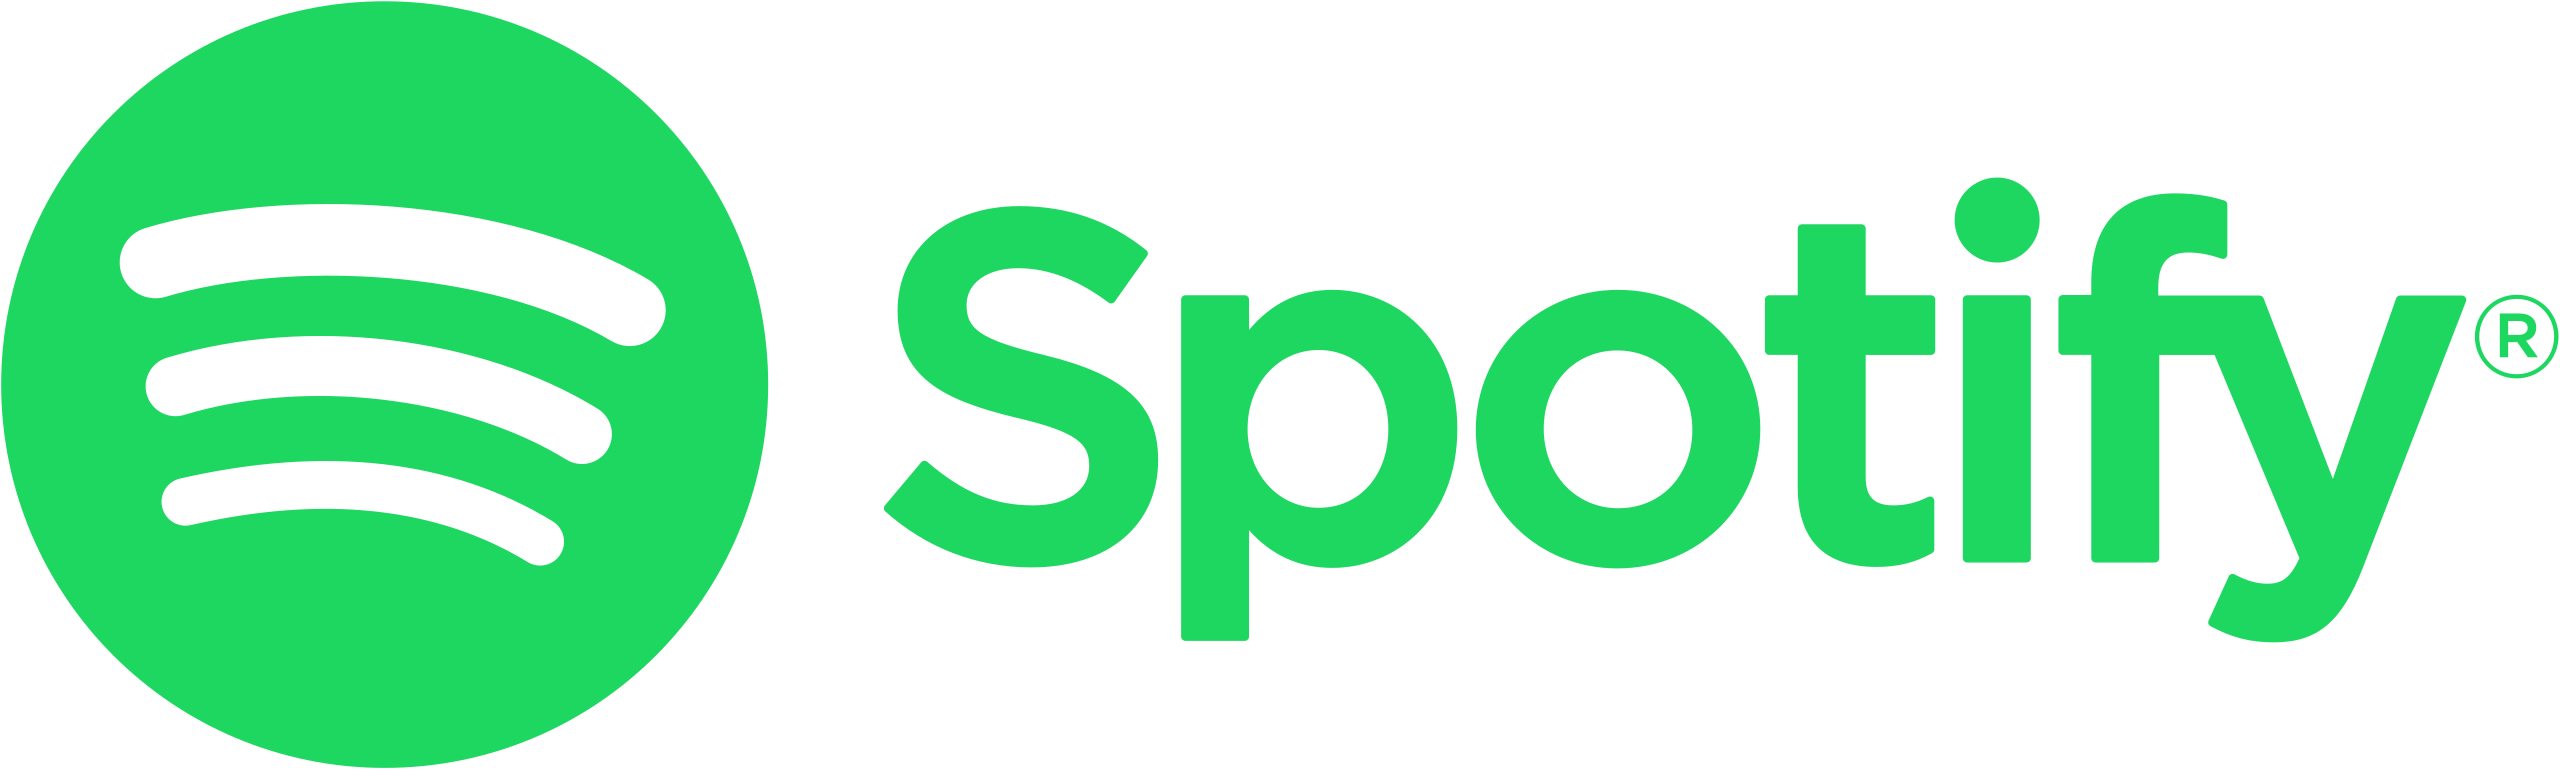

# Analyzing the top 10,000 Spotify Songs
## By: Lauren McNaboe :D

## Column Title Explanation
Index: Number on Excel Sheet<br>
Highest Charting Position: Highest position on the chart <br>
Number of Times Charted: Number of Times on the chart <br>
Week of Highest Charting: Number of weeks spent at peak position <br>
Song Name: Name of the Song<br>
Artist Name: Name of the Artist<br>
Artist Followers: Number of followers on Spotify<br>
Song ID: Spotify Song ID<br>
Genre: Genre of Music <br>
Release Date: Date Song was Released <br>
Popularity: Popularity on a scale from 0-100 <br>
Danceability: Dancibility on a scale of 0-1 <br>
Energy: Energy on a scale of 0-1<br>
Loudness: Loudness on a scale of -60-0 dB<br>
Tempo: BPM of the song<br>
Duration: Length of the song (ms) <br>
Chord: Main chord of the instruments

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### Why did I choose this dataset?
I listen to music for 99% of my free time. I listen to music while I do my homework, in the car/on the bus, in the shower (tmi), playing The Sims 4, and just Sitting. I love looking at top charts and seeing how songs have moved over time. I love thinking about why certain songs charted and what could have influenced their spot. I have always been interested in charts and how things perform in a public space, and music is one of the best ways I can see that in our society. 

### Explanation of the Dataset
Sashank Pillai, the owner, created a data set of all of the songs that made it on the top 200 songs on Spotify from 2020-2021. He has many columns that came from spotifycharts.com that explain the elements of the songs that charted. It also has the artist and the title of the song. Spotipy was used to read in and evaluate the music that charted over these 2 years. Spotipy takes information from the Spotify API and rates each song with the parameters.

Reading in the DataFrame

In [26]:
df = pd.read_csv('./data/spotify_dataset.csv')

In [27]:
df.corr()

C:\Users\lmcnaboe\AppData\Local\Temp\ipykernel_14188\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Index,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Tempo,Duration (ms),Duration (s)
Index,1.000000,0.251694,-0.360271,-0.258688,0.090746,-0.335229,0.126422,-0.019604,-0.015226,0.023829,-0.023926,-0.023926
Highest Charting Position,0.251694,1.000000,-0.417312,-0.296137,-0.233079,-0.161503,0.017964,0.066953,0.037012,0.025217,-0.031723,-0.031723
Number of Times Charted,-0.360271,-0.417312,1.000000,-0.060362,0.027022,0.231905,0.026314,-0.062616,0.029200,-0.047860,0.032907,0.032907
Streams,-0.258688,-0.296137,-0.060362,1.000000,0.103473,0.124238,-0.080982,0.004999,-0.030292,0.053312,0.016476,0.016476
Artist Followers,0.090746,-0.233079,0.027022,0.103473,1.000000,0.103086,-0.097677,-0.068445,-0.035710,-0.019400,0.141260,0.141260
Popularity,-0.335229,-0.161503,0.231905,0.124238,0.103086,1.000000,0.026410,0.088246,0.152069,-0.023148,0.078425,0.078425
Danceability,0.126422,0.017964,0.026314,-0.080982,-0.097677,0.026410,1.000000,0.140490,0.233392,-0.039476,-0.103872,-0.103872
Energy,-0.019604,0.066953,-0.062616,0.004999,-0.068445,0.088246,0.140490,1.000000,0.730684,0.115415,0.051940,0.051940
Loudness,-0.015226,0.037012,0.029200,-0.030292,-0.035710,0.152069,0.233392,0.730684,1.000000,0.107229,0.070179,0.070179
Tempo,0.023829,0.025217,-0.047860,0.053312,-0.019400,-0.023148,-0.039476,0.115415,0.107229,1.000000,-0.003174,-0.003174


In [28]:
df.dtypes
df['Loudness']=df['Loudness'].astype('float')
df.dtypes

Index                          int64
Highest Charting Position      int64
Number of Times Charted        int64
Week of Highest Charting      object
Song Name                     object
Streams                        int64
Artist                        object
Artist Followers               int64
Song ID                       object
Genre                         object
Release Date                  object
Weeks Charted                 object
Popularity                     int64
Danceability                 float64
Energy                       float64
Loudness                     float64
Tempo                        float64
Duration (ms)                  int64
Chord                         object
Duration (s)                 float64
dtype: object

In [129]:
df['Artist'].astype('str')
df['Genre'].astype('str')
df['Energy'].astype('float')
df['Loudness'].astype('float')

0       -4.52
1       -4.67
2       -5.80
3       -6.24
4      -10.97
        ...  
1538    -8.44
1539    -9.07
1540    -7.01
1541    -7.15
1542   -15.23
Name: Loudness, Length: 1543, dtype: float64

In [119]:
artist_charted = df[['Artist', 'Number of Times Charted']].groupby('Artist', as_index = False).count()
artist_charted.sort_values(by='Number of Times Charted', ascending = False).head(20)

,Artist,Number of Times Charted
635,Taylor Swift,52
387,Lil Uzi Vert,32
316,Justin Bieber,32
312,Juice WRLD,30
531,Pop Smoke,29
53,BTS,29
55,Bad Bunny,28
210,Eminem,22
649,The Weeknd,21
192,Drake,19


### Plot of the Top 25 Artists with the Most Songs Charted

<AxesSubplot:>

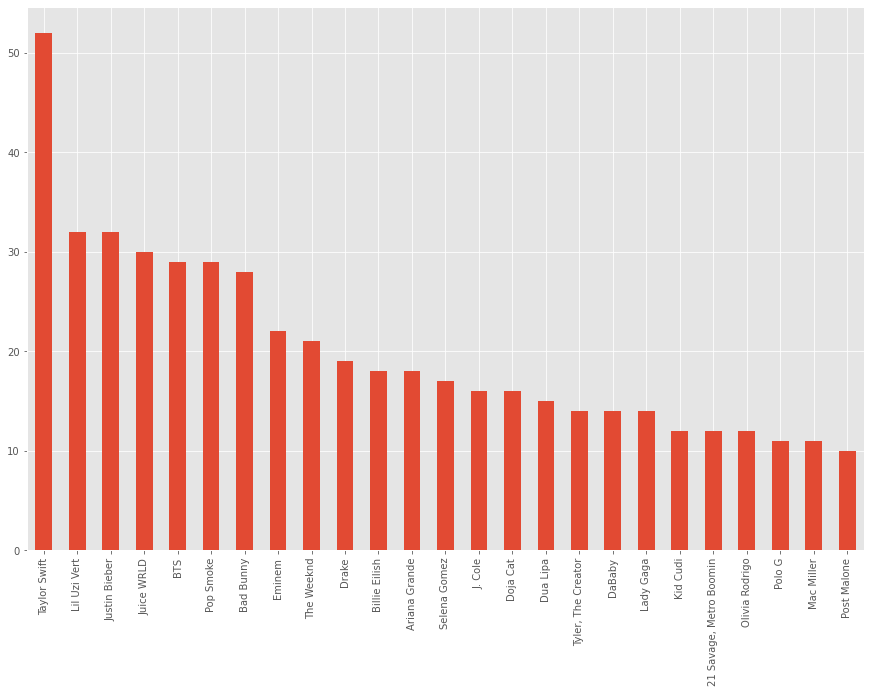

In [31]:
df['Artist'].value_counts()[:25].plot(kind= 'bar', figsize = (15,10))

<AxesSubplot:xlabel='Number of Times Charted', ylabel='Popularity'>

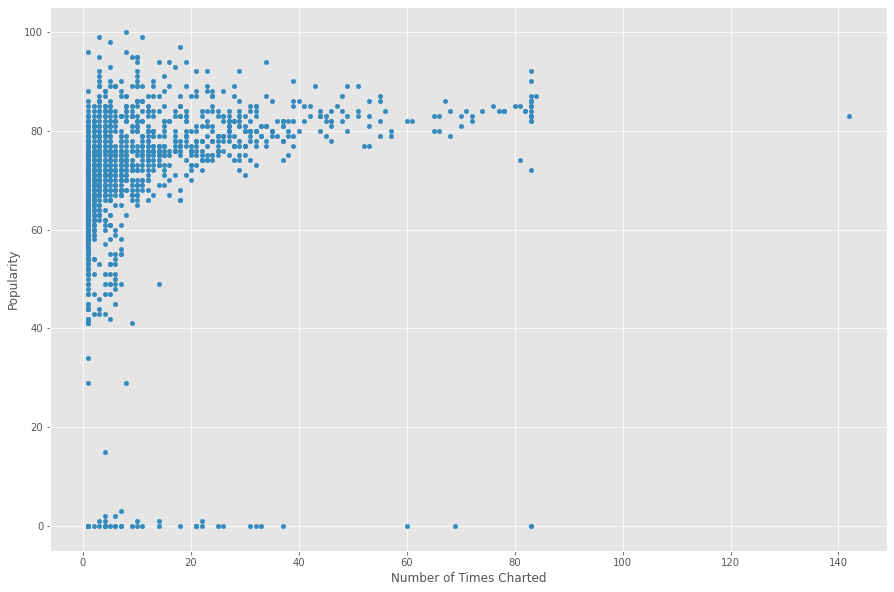

In [32]:
df.plot.scatter(x = 'Number of Times Charted', y = 'Popularity', figsize=(15,10))

In [33]:
del df['Weeks Charted']
del df['Duration (ms)']

Any missing data points were removed from the original excel sheet, as it messed up the correlations and groupby functions. I removed the valence acousticness, instrumentalness, liveness, speechiness, and weeks charted columns. Anything that had to do with the making of the musics (acoustics, etc.) is based on what Spotify thinks the music contains. Weeks charted was removed since there were too many dates. Duration (ms) was changed to Duration (s).

### Creating a Year Released Column

In [97]:
df['Year Released'] = df['Release Date'].str.split('/').str[2]
df['Year Released'].astype('int64')

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
1538    1905
1539    1905
1540    1905
1541    1905
1542    1905
Name: Year Released, Length: 1543, dtype: int64

In [121]:
df['Duration (s)'].astype('int64')
df['Year Released'].astype('int64')

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
1538    1905
1539    1905
1540    1905
1541    1905
1542    1905
Name: Year Released, Length: 1543, dtype: int64

In [99]:
df_rap = df[df['Genre'].str.contains('rap')]
df_pop = df[df['Genre'].str.contains('pop')]
df_latin = df[df['Genre'].str.contains('latin')]
df_hip_hop = df[df['Genre'].str.contains('hip hop')]
min_year = df['Year Released'].min()
max_year = df['Year Released'].max()

In [100]:
df_rap_by_year=df_rap['Year Released'].value_counts()
df_pop_by_year = df_pop['Year Released'].value_counts()
df_latin_by_year = df_latin['Year Released'].value_counts()
df_hip_hop_by_year = df_hip_hop['Year Released'].value_counts()

In [101]:
#df_area = pd.DataFrame({df_rap_by_year, df_pop_by_year, df_latin_by_year, df_hip_hop_by_year}, index = (min_year, max_year))

#df_area.plot(kind='area', stacked=False)
#plot.show(block=true)

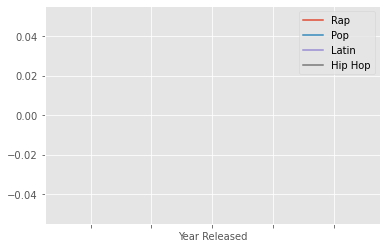

In [103]:
df2 = pd.DataFrame((df_rap_by_year, df_pop_by_year, df_latin_by_year, df_hip_hop_by_year), columns = ['Rap', 'Pop', 'Latin', 'Hip Hop'])
df2.plot()
plt.show()

<AxesSubplot:>

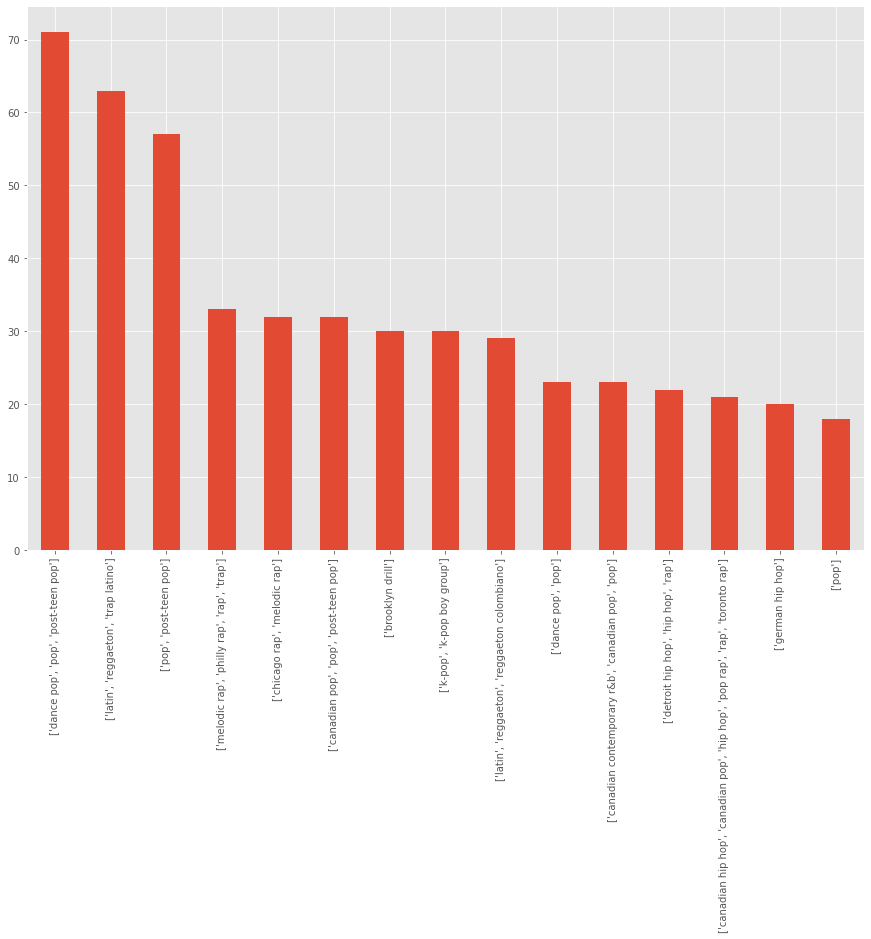

In [117]:
df_top_genre = df['Genre'].value_counts()[1:16]
df_top_genre.plot.bar(figsize= (15,10))


I tried to make a graph with top genres per year, but here are the counts for the top 15 genres from all of the data. :'(


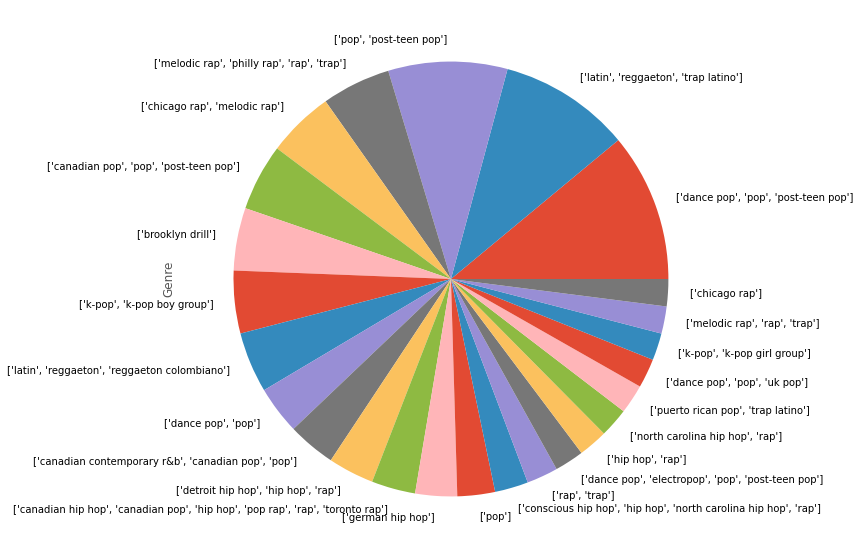

In [125]:
df_genre = df['Genre'].value_counts()[1:26].plot(kind = 'pie', figsize= (15,10))

### Top Genres Value Counts

In [127]:
df_dance_pop = df['Genre'].str.contains('dance pop')
df_pop = df['Genre'].str.contains('pop')
df_post_pop = df['Genre'].str.contains('post-teen pop')